In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
production = pd.read_csv('../raw_data/Production_Cleaned.csv', encoding = 'unicode_escape')
production.head()

,Unnamed: 0,freq,plants,operator,nrg_bal,energy_balance,unit,Country,EU?,Alpha_2_code,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,0,A,CHP,PRR_AUTO,GEP,Grosselectricityproduction,GWH,Albania,False,AL,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,1,A,CHP,PRR_AUTO,GEP,Grosselectricityproduction,GWH,Austria,True,AT,...,5209027,4690911,4453396,4067491,4142426,4331098,4536887,4108578,4170416,4037880
2,2,A,CHP,PRR_AUTO,GEP,Grosselectricityproduction,GWH,Bosnia and Herzegovina,False,BA,...,:,:,:,0.000,0.000,0.000,0.000,0.000,0.000,29000
3,3,A,CHP,PRR_AUTO,GEP,Grosselectricityproduction,GWH,Belgium,True,BE,...,5441300,6023200,6161500,6429000,6476100,6820600,7589700,7728100,9114800,9366900
4,4,A,CHP,PRR_AUTO,GEP,Grosselectricityproduction,GWH,Bulgaria,True,BG,...,124000,255000,251000,233000,360000,399000,583165,637454,636997,650121


In [3]:
production.nrg_bal.nunique()

4

In [4]:
production.describe()

,Unnamed: 0
count,14190.000000
mean,7094.500000
std,4096.444495
min,0.000000
25%,3547.250000
50%,7094.500000
75%,10641.750000
max,14189.000000


In [5]:
EU_countries = pd.DataFrame.from_dict([{'Belgium': 'BE', 'Bulgaria': 'BG', 'Czechia': 'CZ', 'Denmark': 'DK', 'Germany': 'DE', 'Estonia': 'EE', 'Ireland': 'IE', 'Greece': 'EL',
                'Spain': 'ES', 'France': 'FR', 'Croatia': 'HR', 'Italy': 'IT', 'Cyprus': 'CY', 'Latvia': 'LV', 'Lithuania': 'LT', 'Luxembourg': 'LU', 
                'Hungary': 'HU', 'Malta': 'MT', 'Netherlands': 'NL', 'Austria': 'AT', 'Poland': 'PL', 'Portugal': 'PT', 'Romania': 'RO', 'Slovenia': 'SI',
                'Slovakia': 'SK', 'Finland': 'FI', 'Sweden': 'SE'}])
EU_countries = EU_countries.T.reset_index()
EU_countries.rename(columns={'index': 'EU_country', 0: 'Alpha_2_code'}, inplace=True)
EU_countries.head()


,EU_country,Alpha_2_code
0,Belgium,BE
1,Bulgaria,BG
2,Czechia,CZ
3,Denmark,DK
4,Germany,DE


In [6]:
EU_countries.EU_country.nunique()

27

In [7]:
production.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14190 entries, 0 to 14189
Data columns (total 42 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      14190 non-null  int64 
 1   freq            14190 non-null  object
 2   plants          14190 non-null  object
 3   operator        14190 non-null  object
 4   nrg_bal         14190 non-null  object
 5   energy_balance  7482 non-null   object
 6   unit            14190 non-null  object
 7   Country         12870 non-null  object
 8   EU?             14190 non-null  bool  
 9   Alpha_2_code    14190 non-null  object
 10  Alpha_3_code    12870 non-null  object
 11  1990            14190 non-null  object
 12  1991            14190 non-null  object
 13  1992            14190 non-null  object
 14  1993            14190 non-null  object
 15  1994            14190 non-null  object
 16  1995            14190 non-null  object
 17  1996            14190 non-null  object
 18  1997  

# Filtering Electricity Production data to EU-27 Countries only (excluding the UK)

In [8]:
production.Alpha_2_code.unique()

array(['AL', 'AT', 'BA', 'BE', 'BG', 'CY', 'CZ', 'DE', 'DK', 'EA19', 'EE',
       'EL', 'ES', 'EU27_2020', 'FI', 'FR', 'GE', 'HR', 'HU', 'IE', 'IS',
       'IT', 'LI', 'LT', 'LU', 'LV', 'MD', 'ME', 'MK', 'MT', 'NL', 'NO',
       'PL', 'PT', 'RO', 'RS', 'SE', 'SI', 'SK', 'TR', 'UA', 'UK', 'XK'],
      dtype=object)

In [9]:
production.Alpha_2_code.nunique()

43

In [10]:
countries = pd.read_csv('../raw_data/CountryCodes.csv', encoding = 'unicode_escape')
countries.head()

,Country,Alpha_2_code,Alpha_3_code,Numeric
0,Afghanistan,AF,AFG,4.0
1,Albania,AL,ALB,8.0
2,Algeria,DZ,DZA,12.0
3,American Samoa,AS,ASM,16.0
4,Andorra,AD,AND,20.0


In [11]:
countries.Country.nunique()

249

In [12]:
production = production.merge(countries, on='Alpha_2_code', how='left')
production['EU?'] = production['Alpha_2_code'].isin(EU_countries['Alpha_2_code'])
production.sample(10)

,Unnamed: 0,freq,plants,operator,nrg_bal,energy_balance,unit,Country_x,EU?,Alpha_2_code,...,2014,2015,2016,2017,2018,2019,2020,Country_y,Alpha_3_code_y,Numeric
11234,11234,A,TOTAL,PRR_MAIN,GEP,Grosselectricityproduction,GWH,NaN,True,EL,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,Greece,GRC,300.0
1487,1487,A,CHP,PRR_MAIN,GEP,Grosselectricityproduction,GWH,Latvia,True,LV,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,Latvia,LVA,428.0
8777,8777,A,HEAT,TOTAL,NHP,NaN,TJ,Cyprus,True,CY,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,Cyprus,CYP,196.0
3954,3954,A,CHP,TOTAL,NHP,NaN,TJ,United Kingdom,False,UK,...,0.000,0.000,0.000,0.000,0.000,0.000,:,NaN,NaN,NaN
5699,5699,A,ELC,PRR_MAIN,NEP,Netelectricityproduction,GWH,Lithuania,True,LT,...,636000,806000,1130000,1356200,1137500,1490100,1543500,Lithuania,LTU,440.0
3105,3105,A,CHP,TOTAL,GHP,NaN,TJ,NaN,False,EA19,...,0.000,0.000,0.000,0.000,0.000,6000,0.000,NaN,NaN,NaN
3200,3200,A,CHP,TOTAL,GHP,NaN,TJ,Hungary,True,HU,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,Hungary,HUN,348.0
969,969,A,CHP,PRR_AUTO,NEP,Netelectricityproduction,GWH,Lithuania,True,LT,...,234000,255000,262000,243000,223100,213400,196500,Lithuania,LTU,440.0
4237,4237,A,ELC,PRR_AUTO,GEP,Grosselectricityproduction,GWH,Lithuania,True,LT,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,Lithuania,LTU,440.0
2483,2483,A,CHP,PRR_MAIN,NHP,NaN,TJ,Poland,True,PL,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,Poland,POL,616.0


In [13]:
energy_balance = pd.read_csv('../raw_data/Energy_Balance.csv', sep=':', encoding = 'unicode_escape' )
energy_balance.head()

,energy_balance,nrg_bal
0,Imports,IMP
1,Exports,EXP
2,Inlanddemand,ID
3,Transformationinput-electricityandheatgenerati...,TI_EHG_EDHP
4,Transformationinput-electricityandheatgenerati...,TI_EHG_EB


In [14]:
energy_balance.nrg_bal.unique()

array(['IMP', 'EXP', 'ID', 'TI_EHG_EDHP', 'TI_EHG_EB', 'TI_EHG_EPS_PURE',
       'TI_EHG_EPS_MIX', 'NRG_E', 'NRG_EHG_E', 'NRG_CM_E', 'NRG_OIL_NG_E',
       'NRG_PF_E', 'NRG_CO_E', 'NRG_BKBPB_E', 'NRG_GW_E', 'NRG_BF_E',
       '[NRG_PR_E]', 'NRG_NI_E', 'NRG_CL_E', 'NRG_LNG_E', 'NRG_BIOG_E',
       'NRG_GTL_E', 'NRG_CPP_E', 'NRG_NSP_E', 'DL', 'AFC', 'FC',
       'FC_IND_E', 'FC_IND_IS_E', 'FC_IND_CPC_E', 'FC_IND_NFM_E',
       'FC_IND_NMM_E', 'FC_IND_TE_E', 'FC_IND_MAC_E', 'FC_IND_MQ_E',
       'FC_IND_FBT_E', 'FC_IND_PPP_E', 'FC_IND_WP_E', 'FC_IND_CON_E',
       'FC_IND_TL_E', 'FC_IND_NSP_E', 'FC_TRA_E', 'FC_TRA_RAIL_E',
       'FC_TRA_ROAD_E', 'FC_TRA_PIPE_E', 'FC_TRA_NSP_E', 'FC_OTH_CP_E',
       'FC_OTH_HH_E', 'FC_OTH_AF_E', 'FC_OTH_FISH_E', 'FC_OTH_NSP_E',
       'STATDIFF', 'GEP', 'NEP'], dtype=object)

In [15]:
energy_balance.energy_balance.nunique()

54

In [16]:
# production = production[['Alpha_2_code','Country','EU?','Alpha_3_code','nrg_bal','freq','plants', 'operator', 'unit', 
#                            '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
#                            '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
#                            '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
#                            '2017', '2018', '2019', '2020']]
# production.head()

In [17]:
EU_production = production.loc[production['EU?'] == True]
EU_production

,Unnamed: 0,freq,plants,operator,nrg_bal,energy_balance,unit,Country_x,EU?,Alpha_2_code,...,2014,2015,2016,2017,2018,2019,2020,Country_y,Alpha_3_code_y,Numeric
1,1,A,CHP,PRR_AUTO,GEP,Grosselectricityproduction,GWH,Austria,True,AT,...,4067491,4142426,4331098,4536887,4108578,4170416,4037880,Austria,AUT,40.0
3,3,A,CHP,PRR_AUTO,GEP,Grosselectricityproduction,GWH,Belgium,True,BE,...,6429000,6476100,6820600,7589700,7728100,9114800,9366900,Belgium,BEL,56.0
4,4,A,CHP,PRR_AUTO,GEP,Grosselectricityproduction,GWH,Bulgaria,True,BG,...,233000,360000,399000,583165,637454,636997,650121,Bulgaria,BGR,100.0
5,5,A,CHP,PRR_AUTO,GEP,Grosselectricityproduction,GWH,Cyprus,True,CY,...,38000,37000,38000,40524,43707,43736,45608,Cyprus,CYP,196.0
6,6,A,CHP,PRR_AUTO,GEP,Grosselectricityproduction,GWH,Czech Republic,True,CZ,...,8441000,8566000,8738000,8395537,8166103,8043096,7276411,Czechia,CZE,203.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14180,14180,A,TOTAL,TOTAL,NHP,NaN,TJ,Portugal,True,PT,...,55000,87000,0.000,0.000,0.000,0.000,0.000,Portugal,PRT,620.0
14181,14181,A,TOTAL,TOTAL,NHP,NaN,TJ,Romania,True,RO,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,Romania,ROU,642.0
14183,14183,A,TOTAL,TOTAL,NHP,NaN,TJ,Sweden,True,SE,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,Sweden,SWE,752.0
14184,14184,A,TOTAL,TOTAL,NHP,NaN,TJ,Slovenia,True,SI,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,Slovenia,SVN,705.0


In [18]:
EU_production.shape, production.shape

((8910, 45), (14190, 45))

# Missing & Duplicate values in EU Electricity Production

We are also limiting ourselves to only EU Electricity Production data here by excluding GHP and NHP

In [19]:
EU_production.isna().sum().sum()

4872

In [20]:
sum(EU_production.duplicated())

0

In [21]:
production.plants.unique()

array(['CHP', 'ELC', 'HEAT', 'TOTAL'], dtype=object)

In [22]:
production.operator.unique()

array(['PRR_AUTO', 'PRR_MAIN', 'TOTAL'], dtype=object)

In [23]:
EU_production_annual = EU_production.loc[EU_production['operator'] == 'TOTAL']
EU_production_annual

,Unnamed: 0,freq,plants,operator,nrg_bal,energy_balance,unit,Country_x,EU?,Alpha_2_code,...,2014,2015,2016,2017,2018,2019,2020,Country_y,Alpha_3_code_y,Numeric
2667,2667,A,CHP,TOTAL,GEP,Grosselectricityproduction,GWH,Austria,True,AT,...,8652380,8991979,10608317,9619195,9645089,9951487,9844045,Austria,AUT,40.0
2669,2669,A,CHP,TOTAL,GEP,Grosselectricityproduction,GWH,Belgium,True,BE,...,13473900,14572000,15034700,14995300,15578500,15732400,16356800,Belgium,BEL,56.0
2670,2670,A,CHP,TOTAL,GEP,Grosselectricityproduction,GWH,Bulgaria,True,BG,...,5110000,3954000,3903000,3801011,3843730,5229469,5337851,Bulgaria,BGR,100.0
2671,2671,A,CHP,TOTAL,GEP,Grosselectricityproduction,GWH,Cyprus,True,CY,...,51000,51000,52000,55450,57982,57920,60639,Cyprus,CYP,196.0
2672,2672,A,CHP,TOTAL,GEP,Grosselectricityproduction,GWH,Czech Republic,True,CZ,...,17007494,17060418,17017068,16586833,16016339,15748713,15960977,Czechia,CZE,203.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14180,14180,A,TOTAL,TOTAL,NHP,NaN,TJ,Portugal,True,PT,...,55000,87000,0.000,0.000,0.000,0.000,0.000,Portugal,PRT,620.0
14181,14181,A,TOTAL,TOTAL,NHP,NaN,TJ,Romania,True,RO,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,Romania,ROU,642.0
14183,14183,A,TOTAL,TOTAL,NHP,NaN,TJ,Sweden,True,SE,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,Sweden,SWE,752.0
14184,14184,A,TOTAL,TOTAL,NHP,NaN,TJ,Slovenia,True,SI,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,Slovenia,SVN,705.0


In [24]:
EU_production_annual.shape

(3024, 45)

In [25]:
EU_production_annual = EU_production_annual.loc[EU_production_annual['unit'] == 'GWH']
EU_production_annual

,Unnamed: 0,freq,plants,operator,nrg_bal,energy_balance,unit,Country_x,EU?,Alpha_2_code,...,2014,2015,2016,2017,2018,2019,2020,Country_y,Alpha_3_code_y,Numeric
2667,2667,A,CHP,TOTAL,GEP,Grosselectricityproduction,GWH,Austria,True,AT,...,8652380,8991979,10608317,9619195,9645089,9951487,9844045,Austria,AUT,40.0
2669,2669,A,CHP,TOTAL,GEP,Grosselectricityproduction,GWH,Belgium,True,BE,...,13473900,14572000,15034700,14995300,15578500,15732400,16356800,Belgium,BEL,56.0
2670,2670,A,CHP,TOTAL,GEP,Grosselectricityproduction,GWH,Bulgaria,True,BG,...,5110000,3954000,3903000,3801011,3843730,5229469,5337851,Bulgaria,BGR,100.0
2671,2671,A,CHP,TOTAL,GEP,Grosselectricityproduction,GWH,Cyprus,True,CY,...,51000,51000,52000,55450,57982,57920,60639,Cyprus,CYP,196.0
2672,2672,A,CHP,TOTAL,GEP,Grosselectricityproduction,GWH,Czech Republic,True,CZ,...,17007494,17060418,17017068,16586833,16016339,15748713,15960977,Czechia,CZE,203.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13793,13793,A,TOTAL,TOTAL,NEP,Netelectricityproduction,GWH,Portugal,True,PT,...,6000,8000,0.000,0.000,0.000,0.000,0.000,Portugal,PRT,620.0
13794,13794,A,TOTAL,TOTAL,NEP,Netelectricityproduction,GWH,Romania,True,RO,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,Romania,ROU,642.0
13796,13796,A,TOTAL,TOTAL,NEP,Netelectricityproduction,GWH,Sweden,True,SE,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,Sweden,SWE,752.0
13797,13797,A,TOTAL,TOTAL,NEP,Netelectricityproduction,GWH,Slovenia,True,SI,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,Slovenia,SVN,705.0


In [26]:
EU_production_annual.shape

(1566, 45)

In [27]:
columns = ['1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']

In [28]:
# EU_production_annual[columns]= pd.to_numeric(EU_production_annual[columns], errors = 'coerce') this will work in a for loop

In [29]:
EU_production_annual[columns]= EU_production_annual[columns].apply(pd.to_numeric, errors = 'coerce')

/var/folders/bb/d2nrtjg13jv6cd6m6k1c7s8m0000gn/T/ipykernel_68620/918850703.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EU_production_annual[columns]= EU_production_annual[columns].apply(pd.to_numeric, errors = 'coerce')


In [30]:
EU_production_annual.loc['EU_Total'] = EU_production_annual[columns].sum()

/var/folders/bb/d2nrtjg13jv6cd6m6k1c7s8m0000gn/T/ipykernel_68620/1449393238.py:1: FutureWarning: Behavior when concatenating bool-dtype and numeric-dtype arrays is deprecated; in a future version these will cast to object dtype (instead of coercing bools to numeric values). To retain the old behavior, explicitly cast bool-dtype arrays to numeric dtype.
  EU_production_annual.loc['EU_Total'] = EU_production_annual[columns].sum()
/var/folders/bb/d2nrtjg13jv6cd6m6k1c7s8m0000gn/T/ipykernel_68620/1449393238.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EU_production_annual.loc['EU_Total'] = EU_production_annual[columns].sum()


In [31]:
#Adding EU Total Production by year as a separate dataframe
EU_Total_NEP = EU_production_annual.loc[EU_production_annual['nrg_bal'] == 'NEP']
EU_Total_NEP = pd.DataFrame(EU_production_annual[columns].sum())
EU_Total_NEP = EU_Total_NEP.rename(columns={0:'NEP'})
EU_Total_NEP

,NEP
1990,3.539427e+10
1991,3.606929e+10
1992,3.589872e+10
1993,3.589851e+10
1994,3.646883e+10
1995,3.757689e+10
1996,3.893293e+10
1997,3.912269e+10
1998,3.999952e+10
1999,4.042152e+10


In [32]:
EU_Total_GEP = EU_production_annual.loc[EU_production_annual['nrg_bal'] == 'GEP']
EU_Total_GEP = pd.DataFrame(EU_production_annual[columns].sum())
EU_Total_GEP = EU_Total_GEP.rename(columns={0:'GEP'})
EU_Total_GEP

,GEP
1990,3.539427e+10
1991,3.606929e+10
1992,3.589872e+10
1993,3.589851e+10
1994,3.646883e+10
1995,3.757689e+10
1996,3.893293e+10
1997,3.912269e+10
1998,3.999952e+10
1999,4.042152e+10


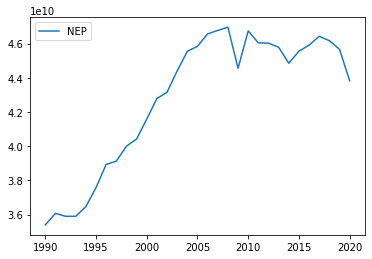

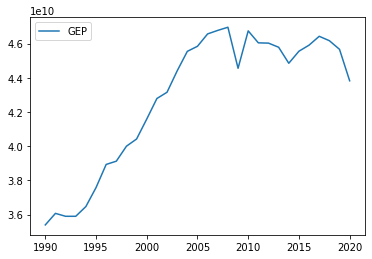

In [33]:
EU_Total_NEP.plot();
EU_Total_GEP.plot();

In [34]:
EU_Total_NEP.dtypes

NEP    float64
dtype: object

In [35]:
EU_production_annual

,Unnamed: 0,freq,plants,operator,nrg_bal,energy_balance,unit,Country_x,EU?,Alpha_2_code,...,2014,2015,2016,2017,2018,2019,2020,Country_y,Alpha_3_code_y,Numeric
2667,2667.0,A,CHP,TOTAL,GEP,Grosselectricityproduction,GWH,Austria,1.0,AT,...,8.652380e+06,8.991979e+06,1.060832e+07,9.619195e+06,9.645089e+06,9.951487e+06,9.844045e+06,Austria,AUT,40.0
2669,2669.0,A,CHP,TOTAL,GEP,Grosselectricityproduction,GWH,Belgium,1.0,BE,...,1.347390e+07,1.457200e+07,1.503470e+07,1.499530e+07,1.557850e+07,1.573240e+07,1.635680e+07,Belgium,BEL,56.0
2670,2670.0,A,CHP,TOTAL,GEP,Grosselectricityproduction,GWH,Bulgaria,1.0,BG,...,5.110000e+06,3.954000e+06,3.903000e+06,3.801011e+06,3.843730e+06,5.229469e+06,5.337851e+06,Bulgaria,BGR,100.0
2671,2671.0,A,CHP,TOTAL,GEP,Grosselectricityproduction,GWH,Cyprus,1.0,CY,...,5.100000e+04,5.100000e+04,5.200000e+04,5.545000e+04,5.798200e+04,5.792000e+04,6.063900e+04,Cyprus,CYP,196.0
2672,2672.0,A,CHP,TOTAL,GEP,Grosselectricityproduction,GWH,Czech Republic,1.0,CZ,...,1.700749e+07,1.706042e+07,1.701707e+07,1.658683e+07,1.601634e+07,1.574871e+07,1.596098e+07,Czechia,CZE,203.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13794,13794.0,A,TOTAL,TOTAL,NEP,Netelectricityproduction,GWH,Romania,1.0,RO,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Romania,ROU,642.0
13796,13796.0,A,TOTAL,TOTAL,NEP,Netelectricityproduction,GWH,Sweden,1.0,SE,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Sweden,SWE,752.0
13797,13797.0,A,TOTAL,TOTAL,NEP,Netelectricityproduction,GWH,Slovenia,1.0,SI,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Slovenia,SVN,705.0
13798,13798.0,A,TOTAL,TOTAL,NEP,Netelectricityproduction,GWH,Slovakia,1.0,SK,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Slovakia,SVK,703.0


In [36]:
EU_production_annual.dtypes

Unnamed: 0        float64
freq               object
plants             object
operator           object
nrg_bal            object
energy_balance     object
unit               object
Country_x          object
EU?               float64
Alpha_2_code       object
Alpha_3_code_x     object
1990              float64
1991              float64
1992              float64
1993              float64
1994              float64
1995              float64
1996              float64
1997              float64
1998              float64
1999              float64
2000              float64
2001              float64
2002              float64
2003              float64
2004              float64
2005              float64
2006              float64
2007              float64
2008              float64
2009              float64
2010              float64
2011              float64
2012              float64
2013              float64
2014              float64
2015              float64
2016              float64
2017        

In [37]:
EU_production_annual

,Unnamed: 0,freq,plants,operator,nrg_bal,energy_balance,unit,Country_x,EU?,Alpha_2_code,...,2014,2015,2016,2017,2018,2019,2020,Country_y,Alpha_3_code_y,Numeric
2667,2667.0,A,CHP,TOTAL,GEP,Grosselectricityproduction,GWH,Austria,1.0,AT,...,8.652380e+06,8.991979e+06,1.060832e+07,9.619195e+06,9.645089e+06,9.951487e+06,9.844045e+06,Austria,AUT,40.0
2669,2669.0,A,CHP,TOTAL,GEP,Grosselectricityproduction,GWH,Belgium,1.0,BE,...,1.347390e+07,1.457200e+07,1.503470e+07,1.499530e+07,1.557850e+07,1.573240e+07,1.635680e+07,Belgium,BEL,56.0
2670,2670.0,A,CHP,TOTAL,GEP,Grosselectricityproduction,GWH,Bulgaria,1.0,BG,...,5.110000e+06,3.954000e+06,3.903000e+06,3.801011e+06,3.843730e+06,5.229469e+06,5.337851e+06,Bulgaria,BGR,100.0
2671,2671.0,A,CHP,TOTAL,GEP,Grosselectricityproduction,GWH,Cyprus,1.0,CY,...,5.100000e+04,5.100000e+04,5.200000e+04,5.545000e+04,5.798200e+04,5.792000e+04,6.063900e+04,Cyprus,CYP,196.0
2672,2672.0,A,CHP,TOTAL,GEP,Grosselectricityproduction,GWH,Czech Republic,1.0,CZ,...,1.700749e+07,1.706042e+07,1.701707e+07,1.658683e+07,1.601634e+07,1.574871e+07,1.596098e+07,Czechia,CZE,203.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13794,13794.0,A,TOTAL,TOTAL,NEP,Netelectricityproduction,GWH,Romania,1.0,RO,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Romania,ROU,642.0
13796,13796.0,A,TOTAL,TOTAL,NEP,Netelectricityproduction,GWH,Sweden,1.0,SE,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Sweden,SWE,752.0
13797,13797.0,A,TOTAL,TOTAL,NEP,Netelectricityproduction,GWH,Slovenia,1.0,SI,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Slovenia,SVN,705.0
13798,13798.0,A,TOTAL,TOTAL,NEP,Netelectricityproduction,GWH,Slovakia,1.0,SK,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Slovakia,SVK,703.0


In [38]:
EU_production_1990 = EU_production_annual['1990'].sum()
EU_production_1990

35394268975.36

In [39]:
# EU_production_annual.loc['EU_Total'] = EU_production_annual[columns].sum()

In [40]:
EU_production_annual

,Unnamed: 0,freq,plants,operator,nrg_bal,energy_balance,unit,Country_x,EU?,Alpha_2_code,...,2014,2015,2016,2017,2018,2019,2020,Country_y,Alpha_3_code_y,Numeric
2667,2667.0,A,CHP,TOTAL,GEP,Grosselectricityproduction,GWH,Austria,1.0,AT,...,8.652380e+06,8.991979e+06,1.060832e+07,9.619195e+06,9.645089e+06,9.951487e+06,9.844045e+06,Austria,AUT,40.0
2669,2669.0,A,CHP,TOTAL,GEP,Grosselectricityproduction,GWH,Belgium,1.0,BE,...,1.347390e+07,1.457200e+07,1.503470e+07,1.499530e+07,1.557850e+07,1.573240e+07,1.635680e+07,Belgium,BEL,56.0
2670,2670.0,A,CHP,TOTAL,GEP,Grosselectricityproduction,GWH,Bulgaria,1.0,BG,...,5.110000e+06,3.954000e+06,3.903000e+06,3.801011e+06,3.843730e+06,5.229469e+06,5.337851e+06,Bulgaria,BGR,100.0
2671,2671.0,A,CHP,TOTAL,GEP,Grosselectricityproduction,GWH,Cyprus,1.0,CY,...,5.100000e+04,5.100000e+04,5.200000e+04,5.545000e+04,5.798200e+04,5.792000e+04,6.063900e+04,Cyprus,CYP,196.0
2672,2672.0,A,CHP,TOTAL,GEP,Grosselectricityproduction,GWH,Czech Republic,1.0,CZ,...,1.700749e+07,1.706042e+07,1.701707e+07,1.658683e+07,1.601634e+07,1.574871e+07,1.596098e+07,Czechia,CZE,203.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13794,13794.0,A,TOTAL,TOTAL,NEP,Netelectricityproduction,GWH,Romania,1.0,RO,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Romania,ROU,642.0
13796,13796.0,A,TOTAL,TOTAL,NEP,Netelectricityproduction,GWH,Sweden,1.0,SE,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Sweden,SWE,752.0
13797,13797.0,A,TOTAL,TOTAL,NEP,Netelectricityproduction,GWH,Slovenia,1.0,SI,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Slovenia,SVN,705.0
13798,13798.0,A,TOTAL,TOTAL,NEP,Netelectricityproduction,GWH,Slovakia,1.0,SK,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Slovakia,SVK,703.0


In [41]:
EU_production_annual.isna().sum().sum()

130

In [42]:
sum(EU_production_annual.duplicated())

0

Looks like there are missing, null and duplicates in EU Production which includes are types of plants and EU Production (Operator = Total) . Need to understand if they are legit before treating them

In [43]:
EU_production_annual.groupby('Alpha_2_code').count()

,Unnamed: 0,freq,plants,operator,nrg_bal,energy_balance,unit,Country_x,EU?,Alpha_3_code_x,...,2014,2015,2016,2017,2018,2019,2020,Country_y,Alpha_3_code_y,Numeric
Alpha_2_code,,,,,,,,,,,,,,,,,,,,,
AT,58,58,58,58,58,58,58,58,58,58,...,58,58,58,58,58,58,58,58,58,58
BE,58,58,58,58,58,58,58,58,58,58,...,58,58,58,58,58,58,58,58,58,58
BG,58,58,58,58,58,58,58,58,58,58,...,58,58,58,58,58,58,58,58,58,58
CY,58,58,58,58,58,58,58,58,58,58,...,58,58,58,58,58,58,58,58,58,58
CZ,58,58,58,58,58,58,58,58,58,58,...,58,58,58,58,58,58,58,58,58,58
DE,58,58,58,58,58,58,58,58,58,58,...,58,58,58,58,58,58,58,58,58,58
DK,58,58,58,58,58,58,58,58,58,58,...,58,58,58,58,58,58,58,58,58,58
EE,58,58,58,58,58,58,58,58,58,58,...,58,58,58,58,58,58,58,58,58,58
EL,58,58,58,58,58,58,58,0,58,0,...,58,58,58,58,58,58,58,58,58,58


In [44]:
EU_production_annual_missing_val = EU_production_annual.groupby('Alpha_2_code').aggregate(lambda serie: serie.eq(': ').sum())
EU_production_annual_missing_val

,Unnamed: 0,freq,plants,operator,nrg_bal,energy_balance,unit,Country_x,EU?,Alpha_3_code_x,...,2014,2015,2016,2017,2018,2019,2020,Country_y,Alpha_3_code_y,Numeric
Alpha_2_code,,,,,,,,,,,,,,,,,,,,,
AT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CY,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CZ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DK,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
EE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
EL,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
missing_production_data_countries = EU_production_annual_missing_val[EU_production_annual_missing_val.sum(axis=1) != 0]
missing_production_data_countries


,Unnamed: 0,freq,plants,operator,nrg_bal,energy_balance,unit,Country_x,EU?,Alpha_3_code_x,...,2014,2015,2016,2017,2018,2019,2020,Country_y,Alpha_3_code_y,Numeric
Alpha_2_code,,,,,,,,,,,,,,,,,,,,,


In [46]:
EU_production_annual_float = EU_production_annual.loc[:, '1990':'2020'].replace(': ',np.nan).astype(float)
EU_production_annual_float

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
2667,8.651000e+06,9.780000e+06,8.914000e+06,8.985000e+06,9.825000e+06,1.054100e+07,5.287000e+06,5.193000e+06,4.954000e+06,5.275000e+06,...,1.082088e+07,1.074056e+07,9.884666e+06,8.652380e+06,8.991979e+06,1.060832e+07,9.619195e+06,9.645089e+06,9.951487e+06,9.844045e+06
2669,7.316000e+06,7.781000e+06,7.504000e+06,7.237000e+06,7.918000e+06,8.130000e+06,8.101000e+06,7.588000e+06,2.953000e+06,2.969000e+06,...,1.445630e+07,1.533760e+07,1.456700e+07,1.347390e+07,1.457200e+07,1.503470e+07,1.499530e+07,1.557850e+07,1.573240e+07,1.635680e+07
2670,1.126700e+07,1.259200e+07,9.856000e+06,1.031300e+07,8.726000e+06,8.398000e+06,7.801000e+06,6.377000e+06,5.961000e+06,5.605000e+06,...,4.672000e+06,4.984000e+06,5.171000e+06,5.110000e+06,3.954000e+06,3.903000e+06,3.801011e+06,3.843730e+06,5.229469e+06,5.337851e+06
2671,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,6.000000e+04,5.800000e+04,5.700000e+04,5.100000e+04,5.100000e+04,5.200000e+04,5.545000e+04,5.798200e+04,5.792000e+04,6.063900e+04
2672,1.124700e+07,1.117800e+07,1.137700e+07,1.148400e+07,1.160000e+07,1.286500e+07,1.438700e+07,1.454300e+07,1.470400e+07,1.603300e+07,...,1.626884e+07,1.662833e+07,1.755915e+07,1.700749e+07,1.706042e+07,1.701707e+07,1.658683e+07,1.601634e+07,1.574871e+07,1.596098e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13794,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
13796,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
13797,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
13798,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [47]:
EU_production_annual_float = pd.merge(EU_production_annual.loc[:, :'Alpha_2_code'], EU_production_annual_float, left_index=True, right_index=True)
EU_production_annual_float

,Unnamed: 0,freq,plants,operator,nrg_bal,energy_balance,unit,Country_x,EU?,Alpha_2_code,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
2667,2667.0,A,CHP,TOTAL,GEP,Grosselectricityproduction,GWH,Austria,1.0,AT,...,1.082088e+07,1.074056e+07,9.884666e+06,8.652380e+06,8.991979e+06,1.060832e+07,9.619195e+06,9.645089e+06,9.951487e+06,9.844045e+06
2669,2669.0,A,CHP,TOTAL,GEP,Grosselectricityproduction,GWH,Belgium,1.0,BE,...,1.445630e+07,1.533760e+07,1.456700e+07,1.347390e+07,1.457200e+07,1.503470e+07,1.499530e+07,1.557850e+07,1.573240e+07,1.635680e+07
2670,2670.0,A,CHP,TOTAL,GEP,Grosselectricityproduction,GWH,Bulgaria,1.0,BG,...,4.672000e+06,4.984000e+06,5.171000e+06,5.110000e+06,3.954000e+06,3.903000e+06,3.801011e+06,3.843730e+06,5.229469e+06,5.337851e+06
2671,2671.0,A,CHP,TOTAL,GEP,Grosselectricityproduction,GWH,Cyprus,1.0,CY,...,6.000000e+04,5.800000e+04,5.700000e+04,5.100000e+04,5.100000e+04,5.200000e+04,5.545000e+04,5.798200e+04,5.792000e+04,6.063900e+04
2672,2672.0,A,CHP,TOTAL,GEP,Grosselectricityproduction,GWH,Czech Republic,1.0,CZ,...,1.626884e+07,1.662833e+07,1.755915e+07,1.700749e+07,1.706042e+07,1.701707e+07,1.658683e+07,1.601634e+07,1.574871e+07,1.596098e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13794,13794.0,A,TOTAL,TOTAL,NEP,Netelectricityproduction,GWH,Romania,1.0,RO,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
13796,13796.0,A,TOTAL,TOTAL,NEP,Netelectricityproduction,GWH,Sweden,1.0,SE,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
13797,13797.0,A,TOTAL,TOTAL,NEP,Netelectricityproduction,GWH,Slovenia,1.0,SI,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
13798,13798.0,A,TOTAL,TOTAL,NEP,Netelectricityproduction,GWH,Slovakia,1.0,SK,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [48]:
EU_production_annual_float.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1567 entries, 2667 to EU_Total
Data columns (total 41 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      1566 non-null   float64
 1   freq            1566 non-null   object 
 2   plants          1566 non-null   object 
 3   operator        1566 non-null   object 
 4   nrg_bal         1566 non-null   object 
 5   energy_balance  1566 non-null   object 
 6   unit            1566 non-null   object 
 7   Country_x       1508 non-null   object 
 8   EU?             1566 non-null   float64
 9   Alpha_2_code    1566 non-null   object 
 10  1990            1567 non-null   float64
 11  1991            1567 non-null   float64
 12  1992            1567 non-null   float64
 13  1993            1567 non-null   float64
 14  1994            1567 non-null   float64
 15  1995            1567 non-null   float64
 16  1996            1567 non-null   float64
 17  1997            1567 non-null  

In [49]:
EU_production_annual_float.describe()

,Unnamed: 0,EU?,1990,1991,1992,1993,1994,1995,1996,1997,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
count,1566.000000,1566.0,1.567000e+03,1.567000e+03,1.567000e+03,1.567000e+03,1.567000e+03,1.567000e+03,1.567000e+03,1.567000e+03,...,1.567000e+03,1.567000e+03,1.567000e+03,1.567000e+03,1.567000e+03,1.567000e+03,1.567000e+03,1.567000e+03,1.567000e+03,1.567000e+03
mean,8173.393997,1.0,2.258728e+07,2.301805e+07,2.290921e+07,2.290907e+07,2.327303e+07,2.398014e+07,2.484552e+07,2.496661e+07,...,2.938475e+07,2.937449e+07,2.922049e+07,2.862268e+07,2.907224e+07,2.929941e+07,2.962945e+07,2.946515e+07,2.914299e+07,2.796842e+07
std,4091.335080,0.0,4.492184e+08,4.577732e+08,4.556453e+08,4.556578e+08,4.628439e+08,4.768973e+08,4.940870e+08,4.964544e+08,...,5.838711e+08,5.836790e+08,5.806408e+08,5.687875e+08,5.777275e+08,5.821167e+08,5.886134e+08,5.853821e+08,5.788676e+08,5.554140e+08
min,2667.000000,1.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5952.250000,1.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6577.000000,1.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1.193700e+04,1.900000e+04,2.900000e+04,4.700000e+04,5.700000e+04,5.700000e+04,6.600000e+04,7.234800e+04,7.928800e+04,7.634000e+04
75%,12788.750000,1.0,1.521500e+06,1.687000e+06,1.638000e+06,1.500000e+06,1.468000e+06,1.909000e+06,1.939000e+06,2.402500e+06,...,4.683500e+06,4.686500e+06,5.087446e+06,5.140061e+06,5.431300e+06,5.369800e+06,5.536987e+06,5.776439e+06,5.688802e+06,5.646855e+06
max,13798.000000,1.0,1.769713e+10,1.803465e+10,1.794936e+10,1.794925e+10,1.823442e+10,1.878844e+10,1.946646e+10,1.956134e+10,...,2.302295e+10,2.301491e+10,2.289425e+10,2.242587e+10,2.277810e+10,2.295609e+10,2.321467e+10,2.308594e+10,2.283353e+10,2.191325e+10


In [50]:
# EU_production_annual_float.reset_index()

In [51]:
# EU_production_annual_float = EU_production_annual_float[['Alpha_2_code', 'Country', 'freq', 'plants', 'operator', 'nrg_bal', 'unit', 'Country', 'EU?', 'Alpha_2_code',
#                            '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
#                            '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
#                            '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
#                            '2017', '2018', '2019', '2020']]
# EU_production_annual_float.head()

In [52]:
EU_production_annual_totals = EU_production_annual_float.groupby('Alpha_2_code').sum()
EU_production_annual_totals

,Unnamed: 0,EU?,1990,1991,1992,1993,1994,1995,1996,1997,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Alpha_2_code,,,,,,,,,,,,,,,,,,,,,
AT,473015.0,58.0,3.986520e+08,4.091100e+08,4.072260e+08,4.186000e+08,4.245600e+08,4.488400e+08,4.373380e+08,4.514400e+08,...,5.274445e+08,5.837586e+08,5.491694e+08,5.256768e+08,5.222923e+08,5.449256e+08,5.728463e+08,5.499928e+08,5.945680e+08,5.810961e+08
BE,473131.0,58.0,5.552660e+08,5.632000e+08,5.655340e+08,5.547740e+08,5.660980e+08,5.836420e+08,5.974940e+08,6.193060e+08,...,7.157216e+08,6.570132e+08,6.604700e+08,5.741280e+08,5.526944e+08,6.764434e+08,6.833978e+08,5.924046e+08,7.376730e+08,7.059024e+08
BG,473189.0,58.0,3.196320e+08,3.029840e+08,2.691960e+08,2.880720e+08,2.891080e+08,3.171200e+08,3.247240e+08,3.256380e+08,...,3.897320e+08,3.637360e+08,3.372520e+08,3.650820e+08,3.777640e+08,3.486060e+08,3.503935e+08,3.593064e+08,3.403221e+08,3.138972e+08
CY,473247.0,58.0,1.560400e+07,1.643600e+07,1.888400e+07,2.017200e+07,2.094800e+07,1.939600e+07,2.029200e+07,2.121600e+07,...,3.851282e+07,3.704018e+07,3.363716e+07,3.398352e+07,3.539213e+07,3.822110e+07,3.913058e+07,3.955139e+07,4.022112e+07,3.799807e+07
CZ,473305.0,58.0,4.838880e+08,4.685400e+08,4.595960e+08,4.563680e+08,4.554960e+08,4.719960e+08,4.983600e+08,4.997400e+08,...,6.723440e+08,6.738320e+08,6.703780e+08,6.652300e+08,6.483020e+08,6.436040e+08,6.723960e+08,6.797473e+08,6.732245e+08,6.314762e+08
DE,473363.0,58.0,4.243772e+09,4.175954e+09,4.160074e+09,4.073024e+09,4.095932e+09,4.162590e+09,4.305388e+09,4.271284e+09,...,4.780584e+09,4.903050e+09,4.981378e+09,4.897910e+09,5.057844e+09,5.081202e+09,5.114934e+09,5.009152e+09,4.754884e+09,4.496456e+09
DK,473421.0,58.0,2.010560e+08,2.834920e+08,2.382520e+08,2.637320e+08,3.153760e+08,2.858760e+08,4.183680e+08,3.448120e+08,...,2.751112e+08,2.396044e+08,2.715208e+08,2.519970e+08,2.274471e+08,2.384779e+08,2.426434e+08,2.387410e+08,2.328494e+08,2.264568e+08
EE,473537.0,58.0,1.307160e+08,1.107520e+08,8.907200e+07,6.844000e+07,6.863200e+07,6.520000e+07,6.836000e+07,6.913200e+07,...,9.824000e+07,8.997600e+07,1.003920e+08,9.383600e+07,7.684332e+07,9.041440e+07,9.763581e+07,9.318789e+07,5.686274e+07,4.460022e+07
EL,473595.0,58.0,2.695080e+08,2.749800e+08,2.878280e+08,2.953880e+08,3.129840e+08,3.207480e+08,3.280800e+08,3.355080e+08,...,4.544522e+08,4.592445e+08,4.389959e+08,3.892194e+08,3.989280e+08,4.187503e+08,4.237303e+08,4.134516e+08,3.769379e+08,3.747330e+08


# EU Annual Electricity Production

In [53]:
EU_production_annual[columns]= EU_production_annual[columns].apply(pd.to_numeric, errors = 'coerce')

/var/folders/bb/d2nrtjg13jv6cd6m6k1c7s8m0000gn/T/ipykernel_68620/918850703.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EU_production_annual[columns]= EU_production_annual[columns].apply(pd.to_numeric, errors = 'coerce')


In [54]:
EU_production_annual.loc['EU_Total'] = EU_production_annual[columns].sum()

<AxesSubplot:>

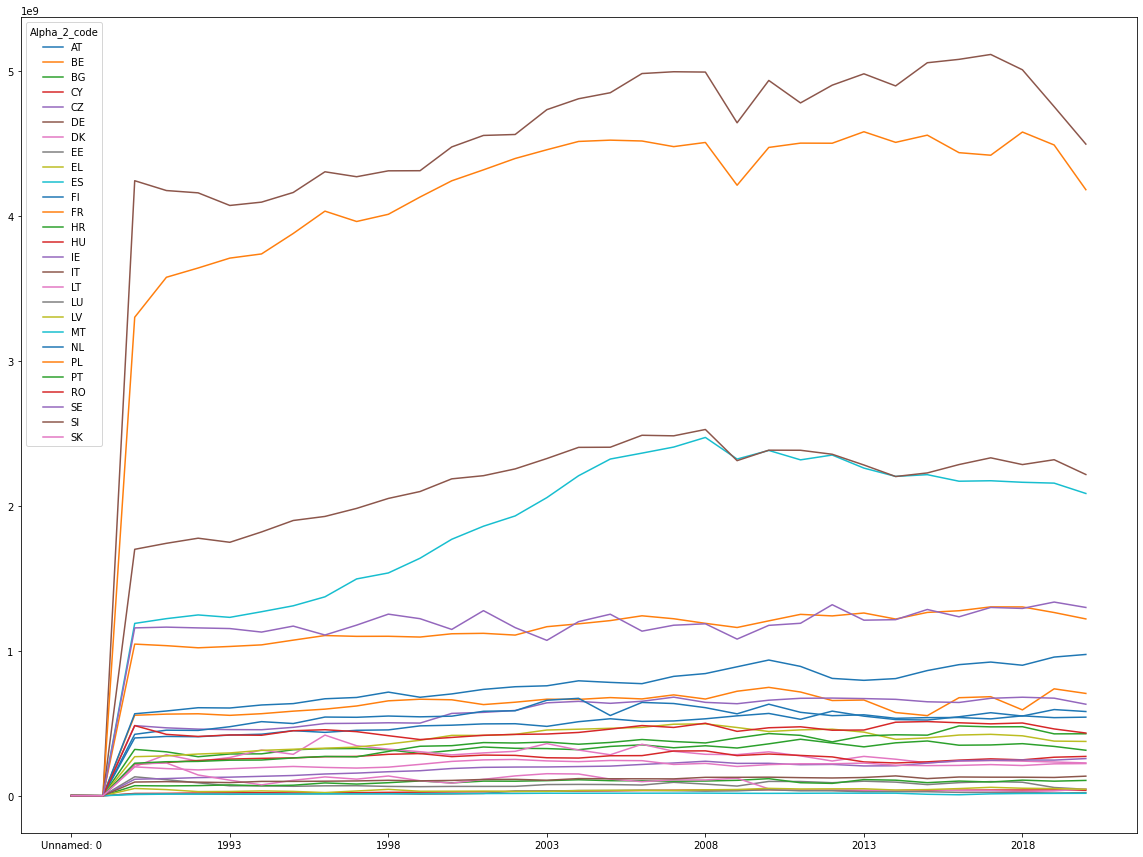

In [55]:
EU_production_annual_totals.T.plot(figsize=(20,15))


In [56]:
EU_production_annual_totals = EU_production_annual_totals.reset_index()[~EU_production_annual_totals.reset_index()['Alpha_2_code'].isin(['EA19', 'EU27_2020'])]
EU_production_annual_totals

,Alpha_2_code,Unnamed: 0,EU?,1990,1991,1992,1993,1994,1995,1996,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,AT,473015.0,58.0,3.986520e+08,4.091100e+08,4.072260e+08,4.186000e+08,4.245600e+08,4.488400e+08,4.373380e+08,...,5.274445e+08,5.837586e+08,5.491694e+08,5.256768e+08,5.222923e+08,5.449256e+08,5.728463e+08,5.499928e+08,5.945680e+08,5.810961e+08
1,BE,473131.0,58.0,5.552660e+08,5.632000e+08,5.655340e+08,5.547740e+08,5.660980e+08,5.836420e+08,5.974940e+08,...,7.157216e+08,6.570132e+08,6.604700e+08,5.741280e+08,5.526944e+08,6.764434e+08,6.833978e+08,5.924046e+08,7.376730e+08,7.059024e+08
2,BG,473189.0,58.0,3.196320e+08,3.029840e+08,2.691960e+08,2.880720e+08,2.891080e+08,3.171200e+08,3.247240e+08,...,3.897320e+08,3.637360e+08,3.372520e+08,3.650820e+08,3.777640e+08,3.486060e+08,3.503935e+08,3.593064e+08,3.403221e+08,3.138972e+08
3,CY,473247.0,58.0,1.560400e+07,1.643600e+07,1.888400e+07,2.017200e+07,2.094800e+07,1.939600e+07,2.029200e+07,...,3.851282e+07,3.704018e+07,3.363716e+07,3.398352e+07,3.539213e+07,3.822110e+07,3.913058e+07,3.955139e+07,4.022112e+07,3.799807e+07
4,CZ,473305.0,58.0,4.838880e+08,4.685400e+08,4.595960e+08,4.563680e+08,4.554960e+08,4.719960e+08,4.983600e+08,...,6.723440e+08,6.738320e+08,6.703780e+08,6.652300e+08,6.483020e+08,6.436040e+08,6.723960e+08,6.797473e+08,6.732245e+08,6.314762e+08
5,DE,473363.0,58.0,4.243772e+09,4.175954e+09,4.160074e+09,4.073024e+09,4.095932e+09,4.162590e+09,4.305388e+09,...,4.780584e+09,4.903050e+09,4.981378e+09,4.897910e+09,5.057844e+09,5.081202e+09,5.114934e+09,5.009152e+09,4.754884e+09,4.496456e+09
6,DK,473421.0,58.0,2.010560e+08,2.834920e+08,2.382520e+08,2.637320e+08,3.153760e+08,2.858760e+08,4.183680e+08,...,2.751112e+08,2.396044e+08,2.715208e+08,2.519970e+08,2.274471e+08,2.384779e+08,2.426434e+08,2.387410e+08,2.328494e+08,2.264568e+08
7,EE,473537.0,58.0,1.307160e+08,1.107520e+08,8.907200e+07,6.844000e+07,6.863200e+07,6.520000e+07,6.836000e+07,...,9.824000e+07,8.997600e+07,1.003920e+08,9.383600e+07,7.684332e+07,9.041440e+07,9.763581e+07,9.318789e+07,5.686274e+07,4.460022e+07
8,EL,473595.0,58.0,2.695080e+08,2.749800e+08,2.878280e+08,2.953880e+08,3.129840e+08,3.207480e+08,3.280800e+08,...,4.544522e+08,4.592445e+08,4.389959e+08,3.892194e+08,3.989280e+08,4.187503e+08,4.237303e+08,4.134516e+08,3.769379e+08,3.747330e+08
9,ES,473653.0,58.0,1.189128e+09,1.221964e+09,1.247514e+09,1.230854e+09,1.269744e+09,1.310648e+09,1.372510e+09,...,2.317680e+09,2.350874e+09,2.260775e+09,2.203528e+09,2.215450e+09,2.170222e+09,2.173474e+09,2.162908e+09,2.157048e+09,2.085700e+09


In [57]:
mask = EU_production_annual_totals.loc[:, '1990':'2020'] == 0

<AxesSubplot:>

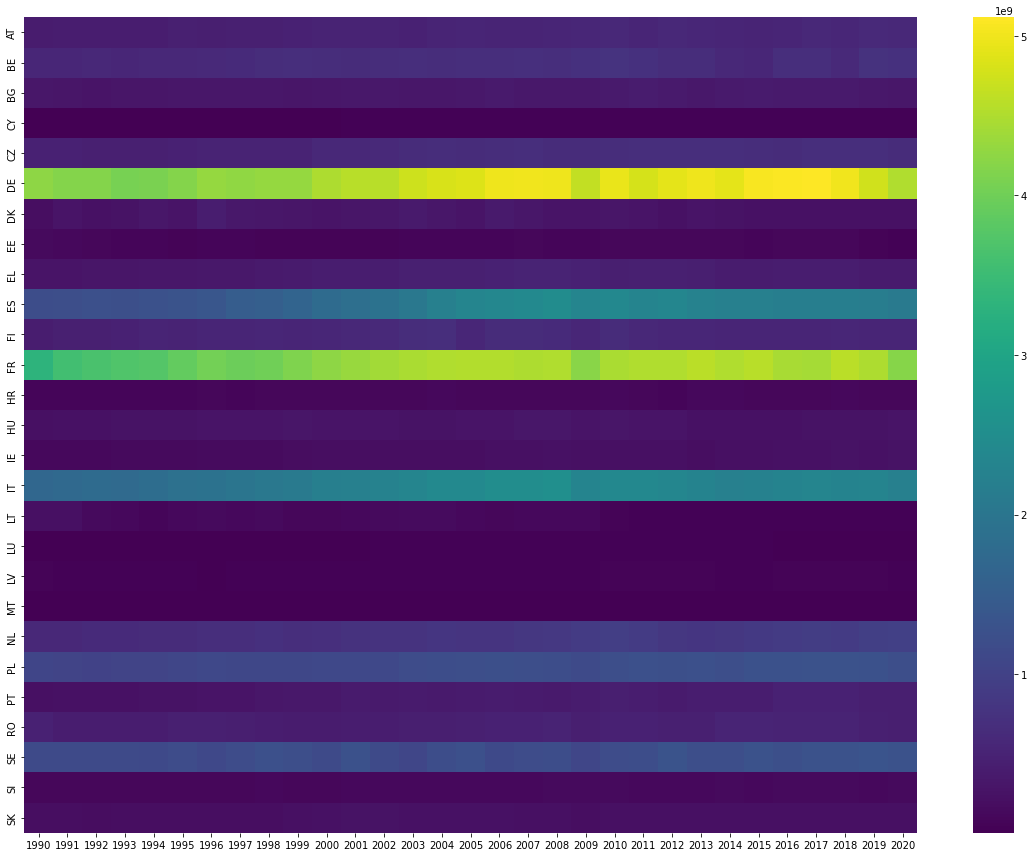

In [58]:
fig, ax = plt.subplots(figsize=(20,15))
sns.heatmap(EU_production_annual_totals.loc[:, '1990':'2020'], yticklabels=EU_production_annual_totals['Alpha_2_code'], mask=mask, cmap="viridis")

Energy Balance Comparison

In [59]:
energy_balance_definitions = pd.read_csv('../raw_data/Energy_Balance.csv', sep=':')
energy_balance_definitions

,energy_balance,nrg_bal
0,Imports,IMP
1,Exports,EXP
2,Inlanddemand,ID
3,Transformationinput-electricityandheatgenerati...,TI_EHG_EDHP
4,Transformationinput-electricityandheatgenerati...,TI_EHG_EB
5,Transformationinput-electricityandheatgenerati...,TI_EHG_EPS_PURE
6,Transformationinput-electricityandheatgenerati...,TI_EHG_EPS_MIX
7,Energysector-energyuse,NRG_E
8,Energysector-electricityandheatgeneration-ener...,NRG_EHG_E
9,Energysector-coalmines-energyuse,NRG_CM_E


In [60]:
EU_production_annual_nrg_bal = EU_production_annual.groupby('nrg_bal').sum()
EU_production_annual_nrg_bal

,Unnamed: 0,EU?,1990,1991,1992,1993,1994,1995,1996,1997,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Numeric
nrg_bal,,,,,,,,,,,,,,,,,,,,,
GEP,6136801.0,783.0,9.134576e+09,9.304898e+09,9.252489e+09,9.248707e+09,9.395114e+09,9.677520e+09,1.002422e+10,1.006614e+10,...,1.181233e+10,1.174114e+10,1.150249e+10,1.168082e+10,1.176681e+10,1.189991e+10,1.182471e+10,1.167949e+10,1.120060e+10,303601.0
NEP,6662734.0,783.0,8.562559e+09,8.729748e+09,8.696873e+09,8.700546e+09,8.839303e+09,9.110922e+09,9.442246e+09,9.495202e+09,...,1.120259e+10,1.115311e+10,1.092338e+10,1.109728e+10,1.118928e+10,1.131477e+10,1.126123e+10,1.115404e+10,1.071265e+10,303601.0


In [61]:
EU_production_annual_nrg_bal.reset_index(inplace=True)

In [62]:
mask = EU_production_annual_nrg_bal.loc[:, '1990':'2020'] == 0


<AxesSubplot:>

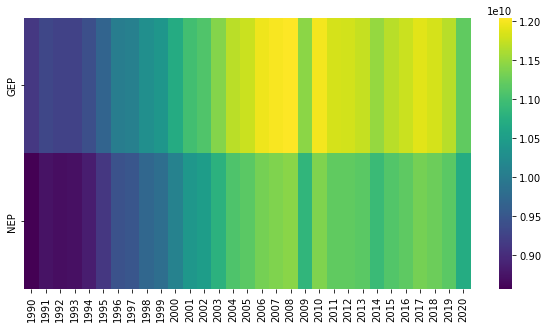

In [63]:
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(EU_production_annual_nrg_bal.loc[:, '1990':'2020'], yticklabels=EU_production_annual_nrg_bal['nrg_bal'], mask=mask, cmap="viridis")

<AxesSubplot:>

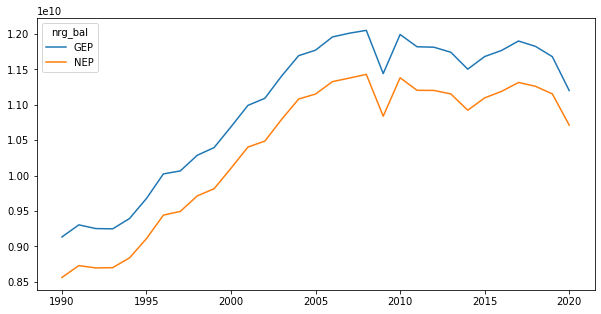

In [64]:
EU_production_annual_nrg_bal.set_index('nrg_bal').loc[:, '1990':'2020'].T.plot(figsize=(10,5))

<AxesSubplot:xlabel='2020', ylabel='Count'>

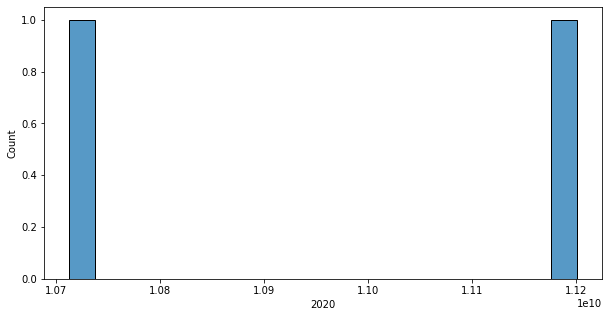

In [65]:
fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(EU_production_annual_nrg_bal.set_index('nrg_bal')['2020'], bins=20)

In [66]:
EU_production_annual_nrg_bal_clusters = EU_production_annual_nrg_bal.groupby(EU_production_annual_nrg_bal.nrg_bal.str.partition("_")[0]).sum()
EU_production_annual_nrg_bal_clusters.index.name = 'nrg_bal_cluster'

There are only types of Energy Balance that are meaningful here: GEP and NEP. Therefore further analysis is not required

# Electricity Production analysis by country (example: Germany)

In [67]:
Elec_production_germany = EU_production_annual[EU_production_annual['Alpha_2_code'] == 'DE']
Elec_production_germany

,Unnamed: 0,freq,plants,operator,nrg_bal,energy_balance,unit,Country_x,EU?,Alpha_2_code,...,2014,2015,2016,2017,2018,2019,2020,Country_y,Alpha_3_code_y,Numeric
2673,2673.0,A,CHP,TOTAL,GEP,Grosselectricityproduction,GWH,Germany,1.0,DE,...,108353000.0,114770000.0,124481000.0,132308000.0,121875000.0,119335000.0,116477000.0,Germany,DEU,276.0
2716,2716.0,A,CHP,TOTAL,GEP,Grosselectricityproduction,GWH,Germany,1.0,DE,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Germany,DEU,276.0
2759,2759.0,A,CHP,TOTAL,GEP,Grosselectricityproduction,GWH,Germany,1.0,DE,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Germany,DEU,276.0
2802,2802.0,A,CHP,TOTAL,GEP,Grosselectricityproduction,GWH,Germany,1.0,DE,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Germany,DEU,276.0
2845,2845.0,A,CHP,TOTAL,GEP,Grosselectricityproduction,GWH,Germany,1.0,DE,...,109349000.0,115546000.0,125371000.0,133210000.0,122411000.0,119914000.0,117096000.0,Germany,DEU,276.0
2888,2888.0,A,CHP,TOTAL,GEP,Grosselectricityproduction,GWH,Germany,1.0,DE,...,996000.0,776000.0,890000.0,902000.0,536000.0,579000.0,619000.0,Germany,DEU,276.0
2931,2931.0,A,CHP,TOTAL,GEP,Grosselectricityproduction,GWH,Germany,1.0,DE,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Germany,DEU,276.0
3361,3361.0,A,CHP,TOTAL,NEP,Netelectricityproduction,GWH,Germany,1.0,DE,...,101973000.0,107931000.0,117770000.0,124989000.0,114810000.0,112882000.0,110232000.0,Germany,DEU,276.0
3404,3404.0,A,CHP,TOTAL,NEP,Netelectricityproduction,GWH,Germany,1.0,DE,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Germany,DEU,276.0
3447,3447.0,A,CHP,TOTAL,NEP,Netelectricityproduction,GWH,Germany,1.0,DE,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Germany,DEU,276.0


In [68]:
Gross_Net_Elec_Prod_Germany = Elec_production_germany.groupby(Elec_production_germany['nrg_bal']).sum()
Gross_Net_Elec_Prod_Germany

,Unnamed: 0,EU?,1990,1991,1992,1993,1994,1995,1996,1997,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Numeric
nrg_bal,,,,,,,,,,,,,,,,,,,,,
GEP,226942.0,29.0,2.204790e+09,2.166152e+09,2.157476e+09,2.112682e+09,2.124550e+09,2.158076e+09,2.230850e+09,2.213302e+09,...,2.525444e+09,2.566372e+09,2.522938e+09,2.605078e+09,2.612972e+09,2.626902e+09,2.574210e+09,2.439548e+09,2.303772e+09,8004.0
NEP,246421.0,29.0,2.038982e+09,2.009802e+09,2.002598e+09,1.960342e+09,1.971382e+09,2.004514e+09,2.074538e+09,2.057982e+09,...,2.377606e+09,2.415006e+09,2.374972e+09,2.452766e+09,2.468230e+09,2.488032e+09,2.434942e+09,2.315336e+09,2.192684e+09,8004.0


<AxesSubplot:>

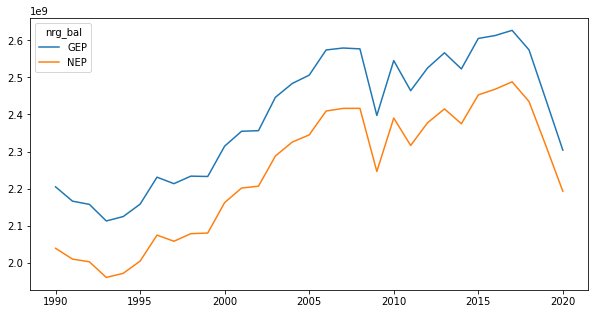

In [69]:
Gross_Net_Elec_Prod_Germany.loc[:, '1990':'2020'].T.plot(figsize=(10,5))

# Quartiles

In [70]:
def groupby_quartiles(df, columnname, quartiles_asc):
    df[columnname + '_perc'] = df[columnname]/df[columnname].sum()*100
    cumulative = df[columnname + '_perc'].sort_values(ascending=quartiles_asc).cumsum()
    
    if quartiles_asc == False:
        df['highest_quartile'] = cumulative >= 75
        df['2nd_highest_quartile'] = cumulative.between(50,75, inclusive='left')
        df['2nd_lowest_quartile'] = cumulative.between(25,50, inclusive='left')
        df['lowest_quartile'] = cumulative < 25
    
    elif quartiles_asc == True:
        df['lowest_quartile'] = cumulative <= 25
        df['2nd_lowest_quartile'] = cumulative.between(25,50, inclusive='right')
        df['2nd_highest_quartile'] = cumulative.between(50,75, inclusive='right')
        df['highest_quartile'] = cumulative > 75
    
    df['quartile'] = (df.iloc[:, 1:] == 1).idxmax(1)
    df.set_index('quartile',inplace=True)
    
    df = df.loc[:,'1990':'2020']
    df = df.groupby('quartile').sum()
    
    return df

In [71]:
EU_Elec_prod_NEP = EU_production_annual[EU_production_annual['nrg_bal']=='NEP']
EU_Elec_prod_NEP

,Unnamed: 0,freq,plants,operator,nrg_bal,energy_balance,unit,Country_x,EU?,Alpha_2_code,...,2014,2015,2016,2017,2018,2019,2020,Country_y,Alpha_3_code_y,Numeric
3355,3355.0,A,CHP,TOTAL,NEP,Netelectricityproduction,GWH,Austria,1.0,AT,...,8230427.0,8527683.0,10088421.0,9183469.0,9190486.0,9531469.0,9417843.0,Austria,AUT,40.0
3357,3357.0,A,CHP,TOTAL,NEP,Netelectricityproduction,GWH,Belgium,1.0,BE,...,13041600.0,14174500.0,14664800.0,14555900.0,15053100.0,15292200.0,15869400.0,Belgium,BEL,56.0
3358,3358.0,A,CHP,TOTAL,NEP,Netelectricityproduction,GWH,Bulgaria,1.0,BG,...,4289000.0,3237000.0,3210000.0,3117969.0,3160856.0,4404343.0,4527491.0,Bulgaria,BGR,100.0
3359,3359.0,A,CHP,TOTAL,NEP,Netelectricityproduction,GWH,Cyprus,1.0,CY,...,51000.0,51000.0,52000.0,55450.0,57982.0,57920.0,60639.0,Cyprus,CYP,196.0
3360,3360.0,A,CHP,TOTAL,NEP,Netelectricityproduction,GWH,Czech Republic,1.0,CZ,...,14857945.0,14856776.0,14862161.0,14388418.0,13914460.0,13617429.0,13665529.0,Czechia,CZE,203.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13793,13793.0,A,TOTAL,TOTAL,NEP,Netelectricityproduction,GWH,Portugal,1.0,PT,...,6000.0,8000.0,0.0,0.0,0.0,0.0,0.0,Portugal,PRT,620.0
13794,13794.0,A,TOTAL,TOTAL,NEP,Netelectricityproduction,GWH,Romania,1.0,RO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Romania,ROU,642.0
13796,13796.0,A,TOTAL,TOTAL,NEP,Netelectricityproduction,GWH,Sweden,1.0,SE,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sweden,SWE,752.0
13797,13797.0,A,TOTAL,TOTAL,NEP,Netelectricityproduction,GWH,Slovenia,1.0,SI,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Slovenia,SVN,705.0


In [72]:
EU_Elec_prod_NEP_Quartiles = groupby_quartiles(EU_Elec_prod_NEP, '2020', quartiles_asc=True)


/var/folders/bb/d2nrtjg13jv6cd6m6k1c7s8m0000gn/T/ipykernel_68620/1232422696.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columnname + '_perc'] = df[columnname]/df[columnname].sum()*100
/var/folders/bb/d2nrtjg13jv6cd6m6k1c7s8m0000gn/T/ipykernel_68620/1232422696.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lowest_quartile'] = cumulative <= 25
/var/folders/bb/d2nrtjg13jv6cd6m6k1c7s8m0000gn/T/ipykernel_68620/1232422696.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy o

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
quartile,,,,,,,,,,,,,,,,,,,,,
EU?,8.562559e+09,8.729748e+09,8.696873e+09,8.700546e+09,8.839303e+09,9.110922e+09,9.442246e+09,9.495202e+09,9.713062e+09,9.815051e+09,...,1.120400e+10,1.120259e+10,1.115311e+10,1.092338e+10,1.109728e+10,1.118928e+10,1.131477e+10,1.126123e+10,1.115404e+10,1.071265e+10


<AxesSubplot:>

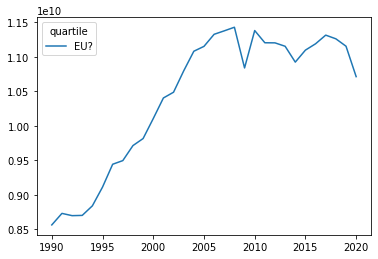

In [73]:
EU_Elec_prod_NEP_Quartiles.T.plot()